Data loaded successfully.

Dataset columns:
Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

Preview of data:
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0         

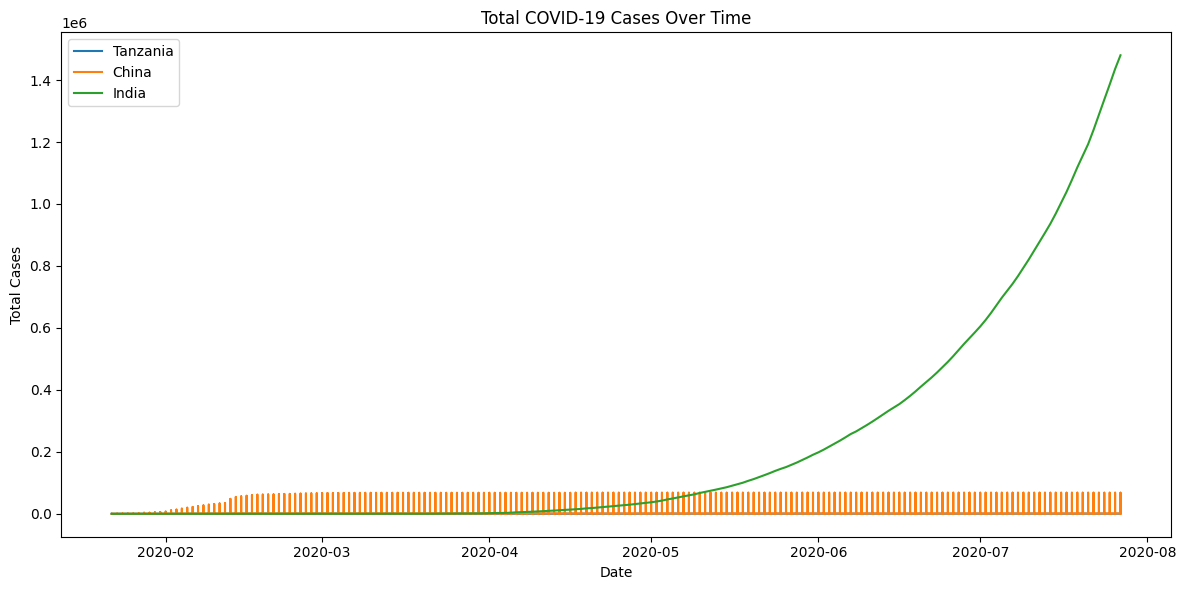

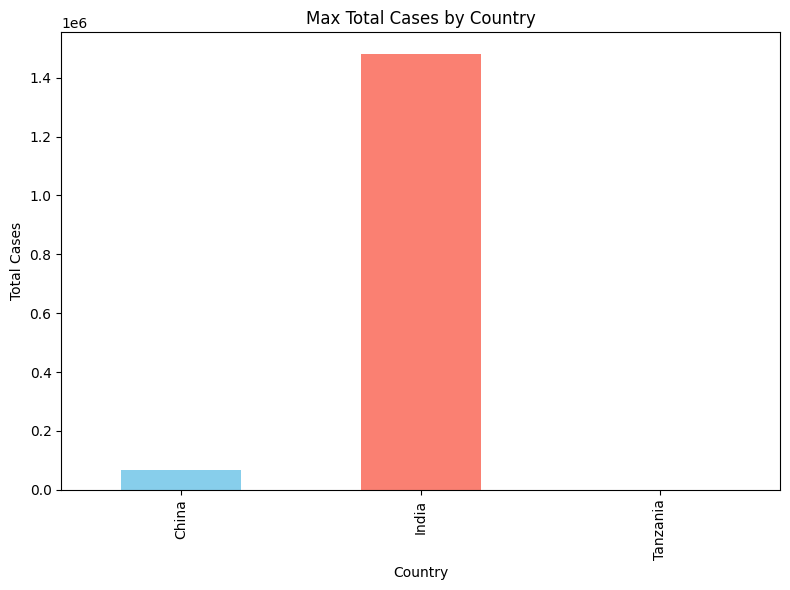

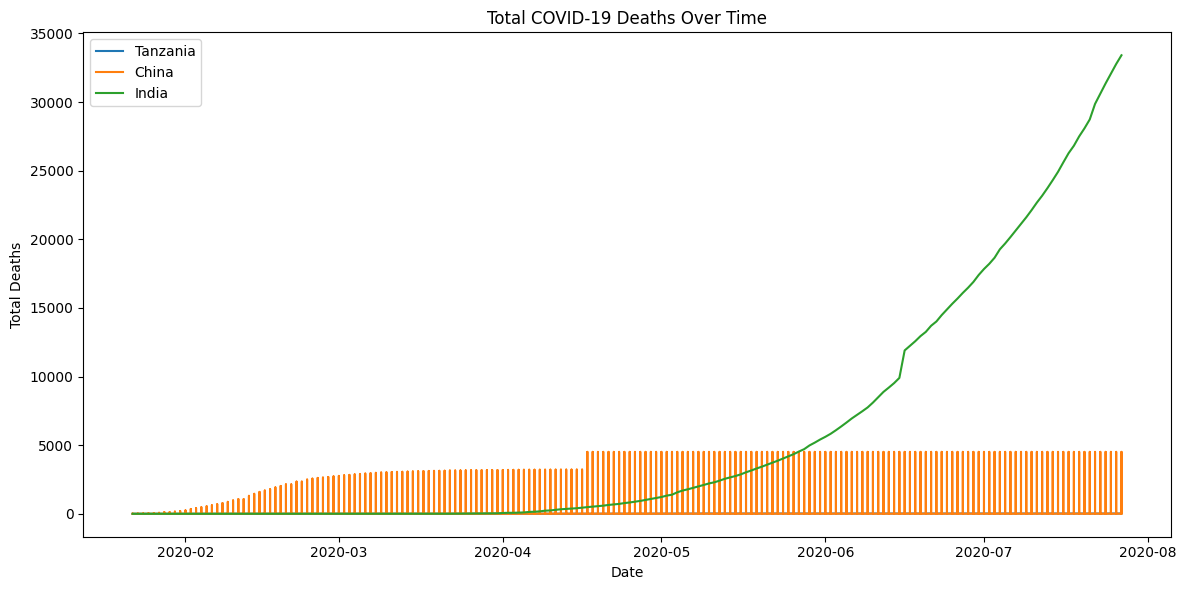

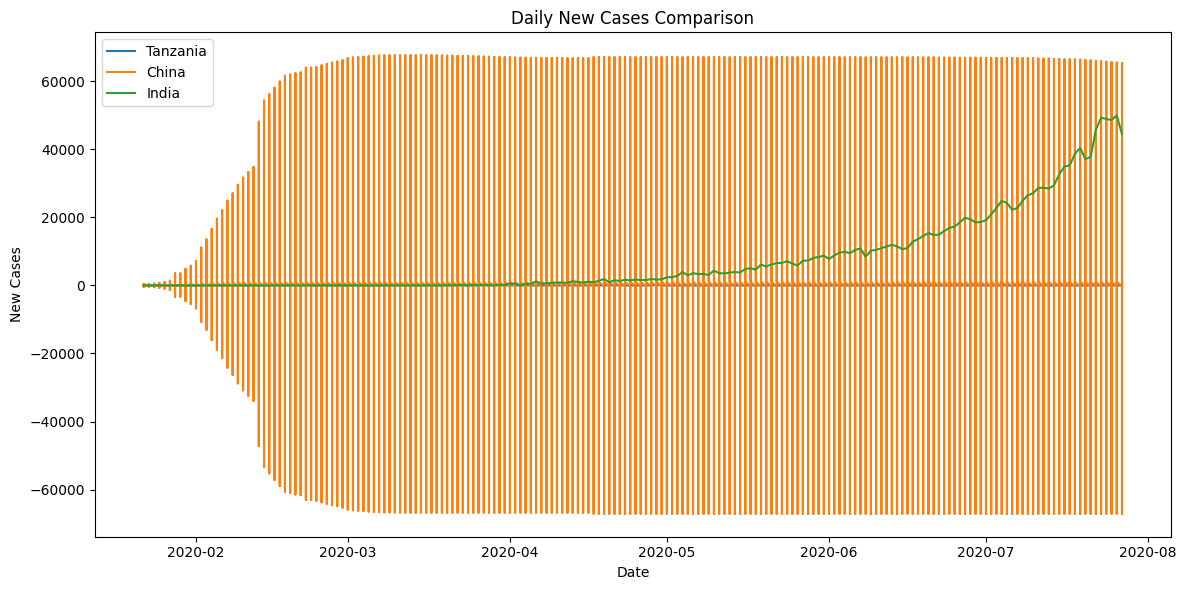

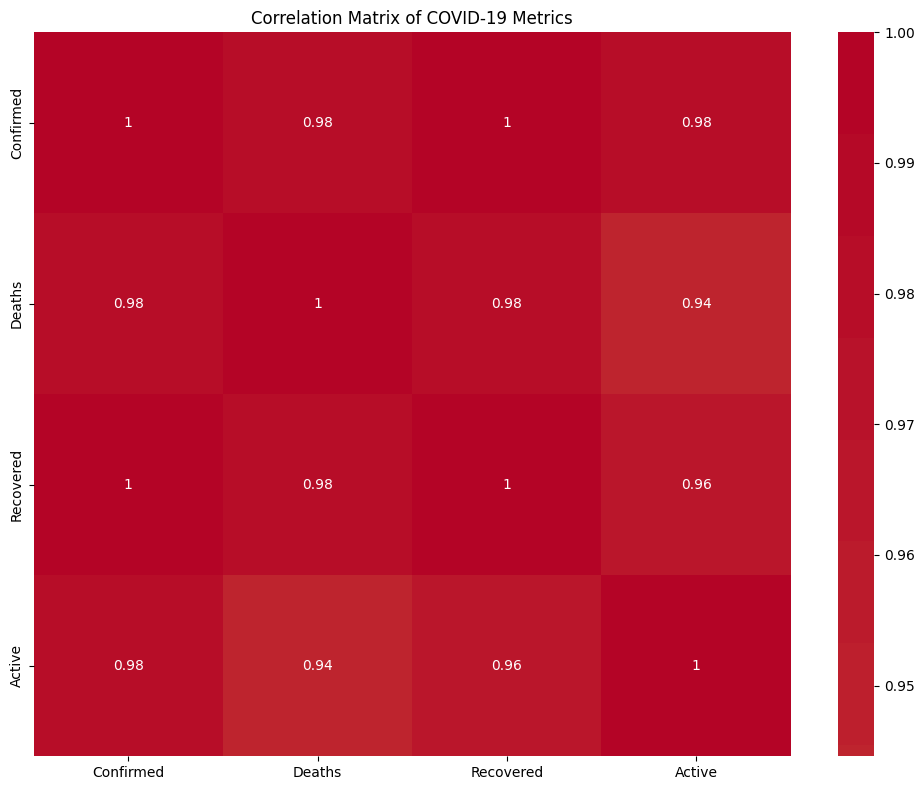

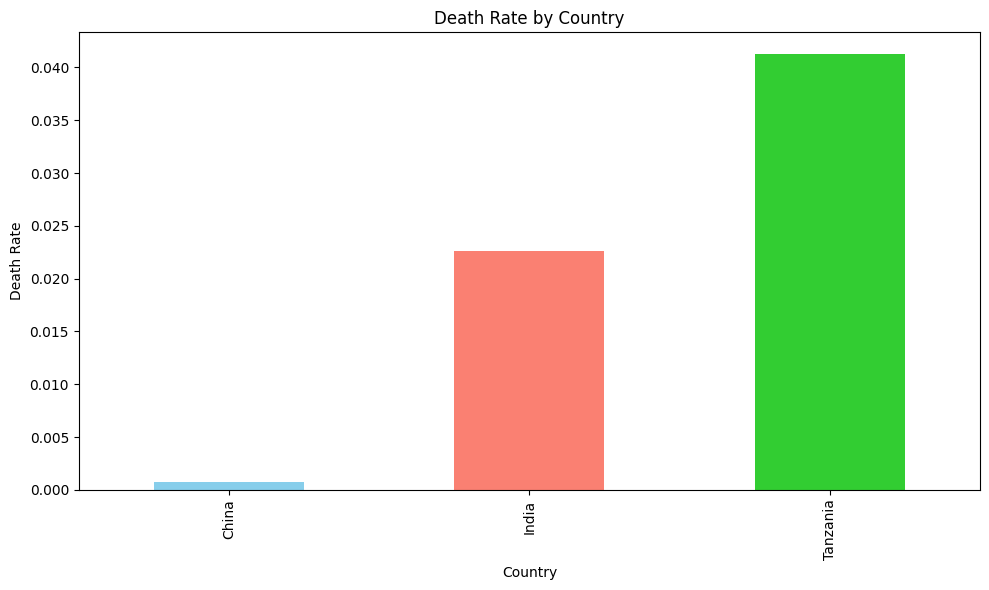


Summary Insights:
- India reported the highest number of total cases (1,480,073).
- India reported the highest number of total deaths (33,408).
- India reported the highest number of recoveries (951,166).
- India had the highest number of active cases.
- Tanzania had the highest death rate among the countries analyzed.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

try:
    df = pd.read_csv("owid-covid-data.csv")
    print("Data loaded successfully.\n")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    df = None

if df is not None:
    print("Dataset columns:")
    print(df.columns)
    print("\nPreview of data:")
    print(df.head())

    countries = ['Tanzania', 'China', 'India']
    df = df[df['Country/Region'].isin(countries)]

    df['date'] = pd.to_datetime(df['Date'])
    df.fillna(0, inplace=True)

    if 'Deaths' in df.columns and 'Confirmed' in df.columns:
        df['death_rate'] = df['Deaths'] / df['Confirmed']
        df['death_rate'] = df['death_rate'].replace([np.inf, -np.inf], 0)

    print("\nSummary Statistics:")

    numeric_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active']
    existing_numeric_columns = [col for col in numeric_columns if col in df.columns]
    if existing_numeric_columns:
        print(df[existing_numeric_columns].describe())

    print("\nMean values grouped by country:")
    existing_group_columns = [col for col in ['Confirmed', 'Deaths', 'Recovered'] if col in df.columns]
    if existing_group_columns:
        print(df.groupby('Country/Region')[existing_group_columns].mean())

    if 'Confirmed' in df.columns:
        plt.figure(figsize=(12, 6))
        for country in countries:
            country_data = df[df['Country/Region'] == country]
            plt.plot(country_data['date'], country_data['Confirmed'], label=country)
        plt.title('Total COVID-19 Cases Over Time')
        plt.xlabel('Date')
        plt.ylabel('Total Cases')
        plt.legend()
        plt.tight_layout()
        plt.show()

    if 'Confirmed' in df.columns:
        plt.figure(figsize=(8, 6))
        total_cases_by_country = df.groupby('Country/Region')['Confirmed'].max()
        total_cases_by_country.plot(kind='bar', color=['skyblue', 'salmon', 'limegreen'])
        plt.title('Max Total Cases by Country')
        plt.xlabel('Country')
        plt.ylabel('Total Cases')
        plt.tight_layout()
        plt.show()


    if 'Deaths' in df.columns:
        plt.figure(figsize=(12, 6))
        for country in countries:
            country_data = df[df['Country/Region'] == country]
            plt.plot(country_data['date'], country_data['Deaths'], label=country)
        plt.title('Total COVID-19 Deaths Over Time')
        plt.xlabel('Date')
        plt.ylabel('Total Deaths')
        plt.legend()
        plt.tight_layout()
        plt.show()

    if 'Confirmed' in df.columns:
        plt.figure(figsize=(12, 6))
        for country in countries:
            country_data = df[df['Country/Region'] == country]
            new_cases = country_data['Confirmed'].diff().fillna(0)
            plt.plot(country_data['date'], new_cases, label=country)
        plt.title('Daily New Cases Comparison')
        plt.xlabel('Date')
        plt.ylabel('New Cases')
        plt.legend()
        plt.tight_layout()
        plt.show()

    if 'total_vaccinations' in df.columns:
        plt.figure(figsize=(12, 6))
        for country in countries:
            country_data = df[df['Country/Region'] == country]
            plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
        plt.title('Total Vaccinations Over Time')
        plt.xlabel('Date')
        plt.ylabel('Total Vaccinations')
        plt.legend()
        plt.tight_layout()
        plt.show()

        if 'Population' in df.columns:
            latest = df.groupby('Country/Region').last()
            latest['vaccination_coverage'] = (latest['total_vaccinations'] / latest['Population']) * 100
            print("\nVaccination Coverage by Country:")
            print(latest[['total_vaccinations', 'Population', 'vaccination_coverage']])

    available_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active']
    if 'total_vaccinations' in df.columns:
        available_columns.append('total_vaccinations')
    
    existing_columns = [col for col in available_columns if col in df.columns]
    
    if existing_columns and len(existing_columns) > 1:
        numeric_data = df[existing_columns].select_dtypes(include=[np.number])
        if not numeric_data.empty and numeric_data.shape[1] > 1:
            plt.figure(figsize=(10, 8))
            correlation_matrix = numeric_data.corr()
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
            plt.title('Correlation Matrix of COVID-19 Metrics')
            plt.tight_layout()
            plt.show()
    
    if 'Confirmed' in df.columns and 'Deaths' in df.columns:
        plt.figure(figsize=(10, 6))
        latest_data = df.groupby('Country/Region').last()
        if 'Confirmed' in latest_data.columns and 'Deaths' in latest_data.columns:
            latest_data['death_rate'] = latest_data['Deaths'] / latest_data['Confirmed']
            latest_data = latest_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['death_rate'])
            if not latest_data.empty:
                latest_data['death_rate'].plot(kind='bar', color=['skyblue', 'salmon', 'limegreen'])
                plt.title('Death Rate by Country')
                plt.xlabel('Country')
                plt.ylabel('Death Rate')
                plt.tight_layout()
                plt.show()

    print("\nSummary Insights:")
    
    if 'Confirmed' in df.columns:
        max_cases_country = df.groupby('Country/Region')['Confirmed'].max().idxmax()
        max_cases_value = df.groupby('Country/Region')['Confirmed'].max().max()
        print(f"- {max_cases_country} reported the highest number of total cases ({max_cases_value:,.0f}).")
    
    if 'Deaths' in df.columns:
        max_deaths_country = df.groupby('Country/Region')['Deaths'].max().idxmax()
        max_deaths_value = df.groupby('Country/Region')['Deaths'].max().max()
        print(f"- {max_deaths_country} reported the highest number of total deaths ({max_deaths_value:,.0f}).")
    
    if 'Recovered' in df.columns:
        max_recovered_country = df.groupby('Country/Region')['Recovered'].max().idxmax()
        max_recovered_value = df.groupby('Country/Region')['Recovered'].max().max()
        print(f"- {max_recovered_country} reported the highest number of recoveries ({max_recovered_value:,.0f}).")
    
    
    if 'Active' in df.columns:
        latest_active = df.groupby('Country/Region')['Active'].last()
        highest_active_country = latest_active.idxmax()
        print(f"- {highest_active_country} had the highest number of active cases.")
    
    if 'death_rate' in df.columns:
        latest_death_rates = df.groupby('Country/Region')['death_rate'].last()
        highest_death_rate_country = latest_death_rates.idxmax()
        print(f"- {highest_death_rate_country} had the highest death rate among the countries analyzed.")